In [42]:
import pandas as pd
import numpy as np

In [43]:
#loading the dataset
df=pd.read_csv("/content/Fraud_check.csv")

In [44]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [45]:
#EDA

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [47]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [48]:
#as there are no null values we can proceed to next step

In [49]:
#converting the taxable_income <= 30000 as "Risky" and others are "Good"

In [50]:
def income(n):
  if n <= 30000:
    return("Risky")
  else:
    return("Good")
df["taxable_income"]=df["Taxable.Income"].apply(income)

In [51]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [52]:
#dropping unwanted columns
df.drop(columns=["Taxable.Income"],inplace=True)

In [53]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [54]:
#encoding the data using labelencoder
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [56]:
df["Undergrad"]=le.fit_transform(df["Undergrad"])

In [57]:
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])

In [58]:
df["Urban"]=le.fit_transform(df["Urban"])

In [59]:
df["taxable_income"]=le.fit_transform(df["taxable_income"])

In [60]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [61]:
df["taxable_income"].unique()

array([0, 1])

In [62]:
#independent and dependent

In [63]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [66]:
#importing random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RF= RandomForestClassifier(criterion="entropy",n_estimators=100,max_features=3)

In [69]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_features=3)

In [70]:
ypred=RF.predict(xtest)

In [71]:
from sklearn.metrics import classification_report

In [72]:

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       138
           1       0.18      0.05      0.08        42

    accuracy                           0.73       180
   macro avg       0.47      0.49      0.46       180
weighted avg       0.63      0.73      0.66       180



In [73]:
RF.score(xtrain,ytrain)

1.0

In [74]:
#as the f1 score and accuracy is good we can consider the above model without any changes

In [75]:
#using cross_val_score

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
cvs= cross_val_score(RF,x,y,cv=10)

In [78]:
cvs.mean()

0.7383333333333334

In [79]:
#visualization
import matplotlib.pyplot as plt

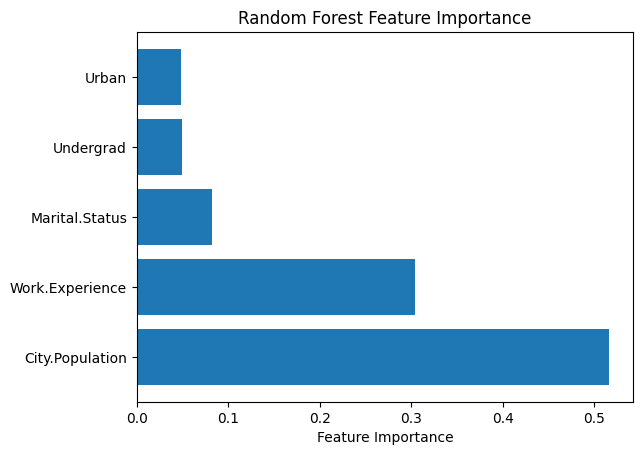

In [80]:
# Get feature importances from the model
feature_importance = RF.feature_importances_

# Create a DataFrame to visualize feature importances
feature_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

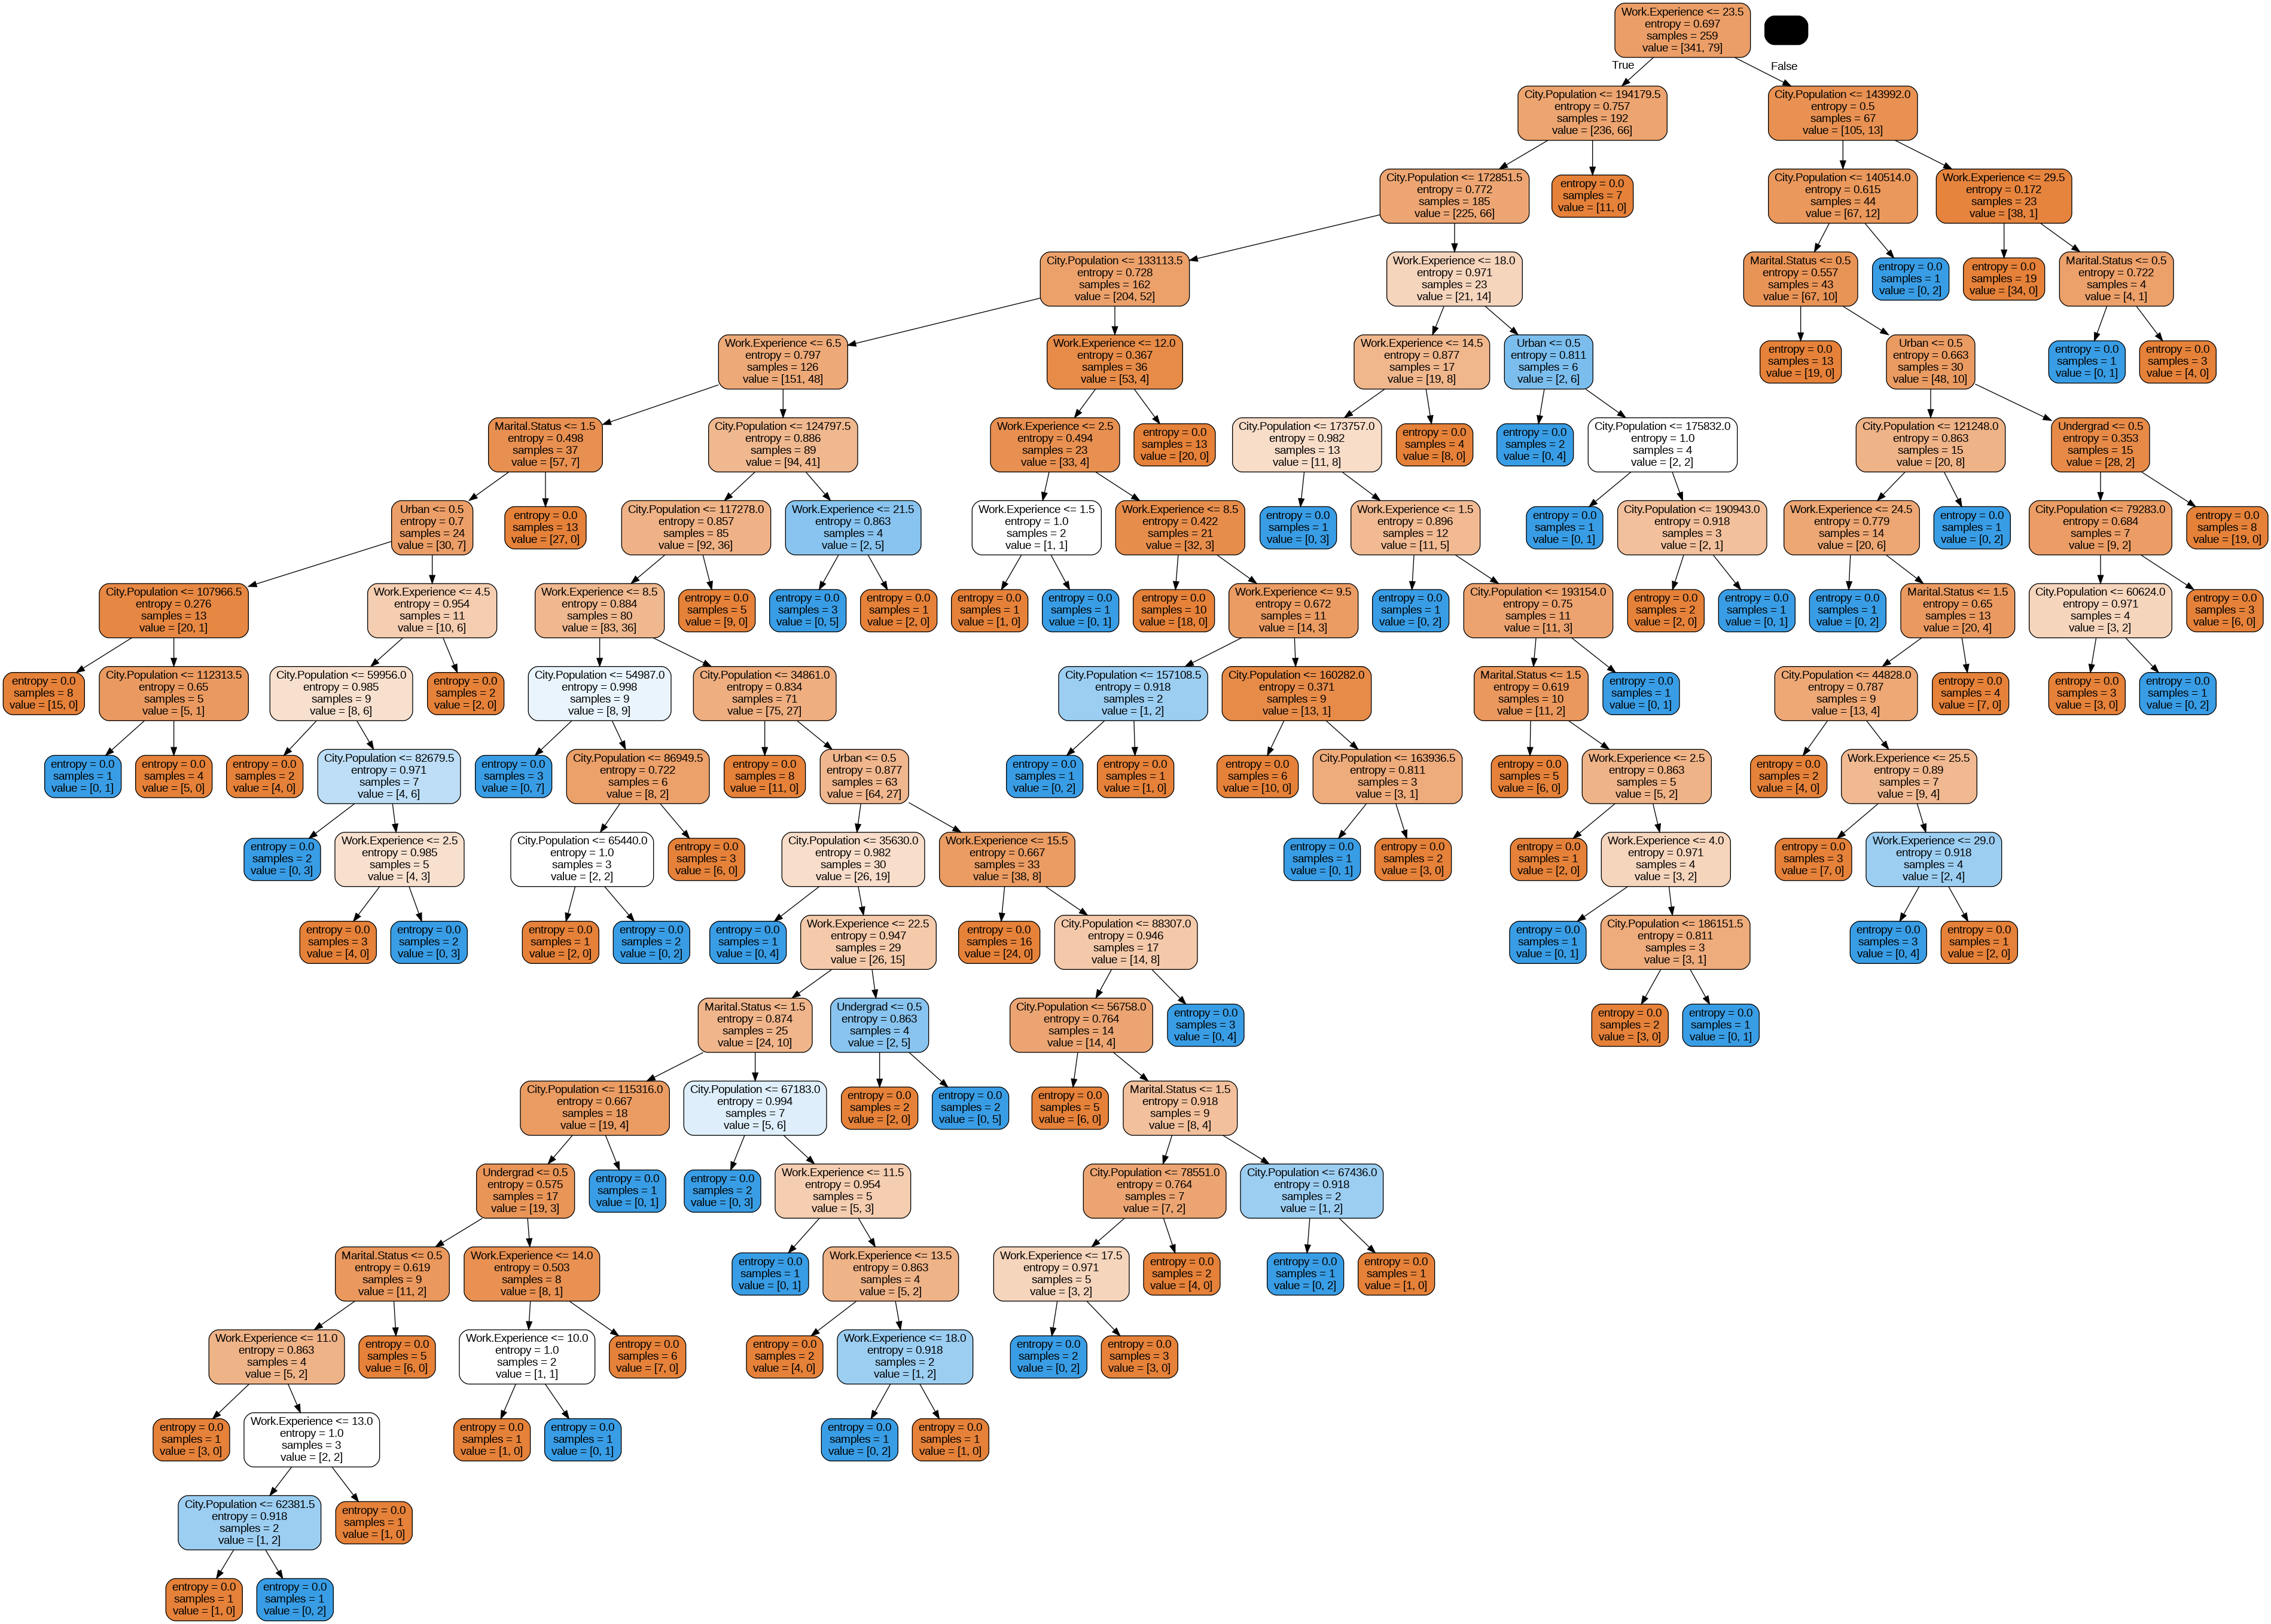

In [117]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

tree = RF.estimators_[0]  # Select the first tree
dot_data = export_graphviz(tree, out_file=None, feature_names=x.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

COMPANY DATASET

In [81]:
#loading the dataset
df1=pd.read_csv("/content/Company_Data.csv")

In [82]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [83]:
#EDA

In [84]:
df1.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [86]:
#as we dont have any null values we can proceed to next step

In [87]:
#converting dependent variable sales into categorical variable

In [88]:
q=df1['Sales'].quantile([0, 0.25, 0.5, 0.75, 1])


In [89]:
def categorical(z):
  if z <= q[0.25]:
    return "low"
  elif z <= q[0.5]:
    return "medium"
  else:
     return "high"
df1["sales_cate"]=df1["Sales"].apply(categorical)

In [90]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cate
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,medium


In [91]:
# dropping the unwanted columns
df1.drop(columns=["Sales"],inplace=True)

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales_cate   400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [93]:
#encoding the dataset by using labelencoder
df1["ShelveLoc"]=le.fit_transform(df1["ShelveLoc"])

In [94]:
df1["Urban"]=le.fit_transform(df1["Urban"])

In [95]:
df1["US"]=le.fit_transform(df1["US"])

In [96]:
df1["sales_cate"]=le.fit_transform(df1["sales_cate"])

In [97]:
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cate
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


In [98]:
#independent and dependent

In [99]:
x1= df1.iloc[:,:-1]
y1= df1.iloc[:,-1]

In [100]:
#installing the model
RF1= RandomForestClassifier(criterion="entropy",n_estimators=100,max_features=3)

In [101]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.3,random_state=50)

In [102]:
RF1.fit(xtrain1,ytrain1)

RandomForestClassifier(criterion='entropy', max_features=3)

In [103]:
ypred1=RF1.predict(xtest1)

In [104]:
print(classification_report(ytest1,ypred1))

              precision    recall  f1-score   support

           0       0.62      0.96      0.76        52
           1       0.75      0.58      0.65        31
           2       0.56      0.24      0.34        37

    accuracy                           0.64       120
   macro avg       0.65      0.60      0.58       120
weighted avg       0.64      0.64      0.60       120



In [105]:
# using cross_val_score
from sklearn.model_selection import cross_val_score

In [106]:
cvs1=  cross_val_score(RF1,x1,y1,cv=20)

In [107]:
cvs1

array([0.8 , 0.65, 0.6 , 0.75, 0.65, 0.65, 0.65, 0.7 , 0.6 , 0.6 , 0.8 ,
       0.75, 0.7 , 0.6 , 0.65, 0.7 , 0.65, 0.75, 0.6 , 0.55])

In [108]:
cvs1.mean()

0.6700000000000002

In [109]:
#visualization
from sklearn.datasets import make_classification
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# 1. Feature Importance Plot
feature_importances = RF1.feature_importances_
sorted_indices = np.argsort(feature_importances)


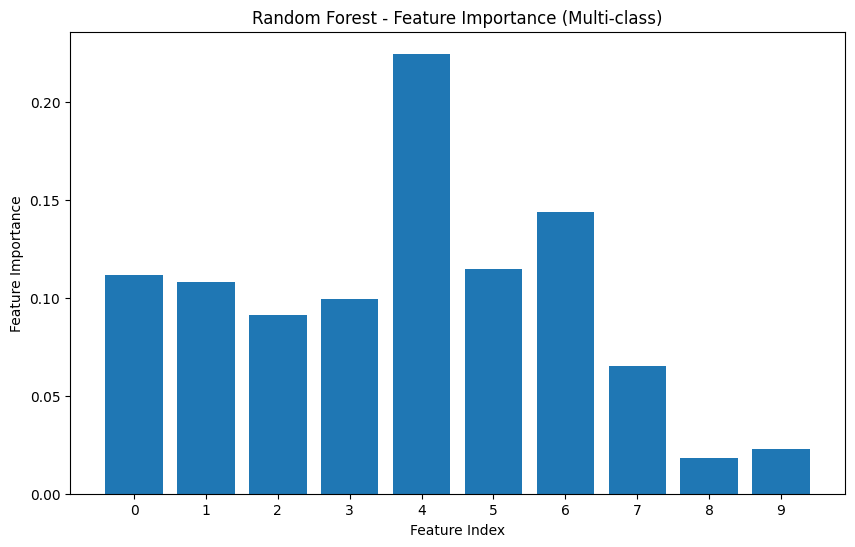

In [111]:
 plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align="center")
plt.xticks(range(len(feature_importances)), range(len(feature_importances)))
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Random Forest - Feature Importance (Multi-class)")
plt.show()